Accuracy: 0.95


/home/iter/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/iter/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'matplotlib' has no attribute 'xlabel'

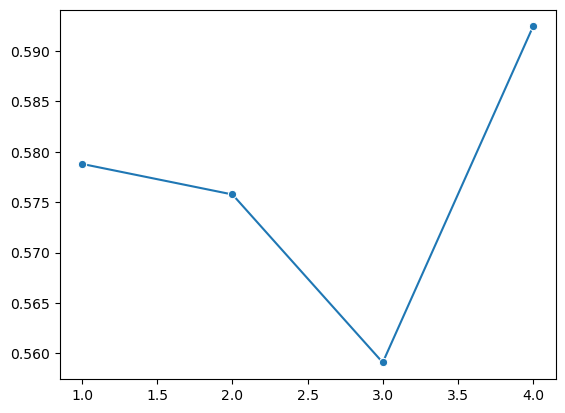

In [9]:
## KNN
#routine method for converting categorical(qualititaive data) to numerical data
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split,RandomizedSearchCV, cross_val_score
from scipy.stats import randint
import seaborn as sns
import matplotlib as plt
## For Decision Tree classifier
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, consensus_score, ConfusionMatrixDisplay, f1_score, classification_report)

data = pd.read_csv('fruit_data.csv')
df = pd.DataFrame(data)
class_names = df['fruit_name'].unique()

#print(df)
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

# print dataframe
#df  
X = df.to_numpy()
X1 = X[:, 3:7]   ## features  : X -> x1, x2,.....xn
Y1 = X[:,1]      # Output : Y
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
# Now split the data into Training and Testing dataset
# Routine method for splitting numpy data
X_train, X_test ,Y_train, Y_test = train_test_split(X1,Y1,test_size=0.33 , random_state= 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


k_values = [i for i in range (1,5)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X1, Y1, cv=5)
    scores.append(np.mean(score))


sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")